In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [70]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [71]:
customers.head(10)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
5,C0006,Brittany Palmer,South America,2024-01-07
6,C0007,Paul Graves,Asia,2022-06-18
7,C0008,David Li,North America,2024-01-13
8,C0009,Joy Clark,Europe,2023-08-14
9,C0010,Aaron Cox,Europe,2022-12-15


In [72]:
products.head(10)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
5,P006,ActiveWear Rug,Home Decor,121.32
6,P007,SoundWave Cookbook,Books,420.15
7,P008,BookWorld Bluetooth Speaker,Electronics,146.85
8,P009,BookWorld Wall Art,Home Decor,325.01
9,P010,ComfortLiving Smartwatch,Electronics,350.13


In [73]:
transactions.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68


In [74]:
le=LabelEncoder()

#for custemers
customers['CustomerID'] = le.fit_transform(customers['CustomerID'])
customers['Region'] = le.fit_transform(customers['Region'])

#for products
products['ProductID'] = le.fit_transform(products['ProductID'])
products['Category'] = le.fit_transform(products['Category'])

#for transaction
transactions['TransactionID'] = le.fit_transform(transactions['TransactionID'])
transactions['CustomerID'] = le.fit_transform(transactions['CustomerID'])
transactions['ProductID'] = le.fit_transform(transactions['ProductID'])


In [75]:
# Convert to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Extract date and time components from transactions dataframe
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['Day'] = transactions['TransactionDate'].dt.day
transactions['DayOfWeek'] = transactions['TransactionDate'].dt.dayofweek
transactions['WeekOfYear'] = transactions['TransactionDate'].dt.isocalendar().week
transactions['Hour'] = transactions['TransactionDate'].dt.hour
transactions['Minute'] = transactions['TransactionDate'].dt.minute
transactions['Second'] = transactions['TransactionDate'].dt.second

In [76]:
# Convert the SignupDate column to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Extract date and time components from customers dataframe
customers['SignupYear'] = customers['SignupDate'].dt.year
customers['SignupMonth'] = customers['SignupDate'].dt.month
customers['SignupDay'] = customers['SignupDate'].dt.day

In [77]:
customers.drop(['SignupDate','CustomerName'],axis=1,inplace=True)
products.drop(['ProductName'],axis=1,inplace=True)
transactions.drop(['TransactionDate','TransactionDate'],axis=1,inplace=True)

In [78]:
#merging all datasets
merged = pd.merge(transactions, customers, on='CustomerID', how='inner')
merged = pd.merge(merged, products, on='ProductID', how='inner')

#Group by CustomerID and ProductID
final_table = merged.groupby(['CustomerID', 'ProductID'], as_index=False).first()

#Keep only the required columns
final_table['Price'] = final_table['Price_x']
final_table = final_table[['CustomerID', 'Region', 'ProductID', 'Category', 'Price', 'TransactionID', 'Quantity', 'TotalValue']]
final_table.head(10)
df=final_table
df.head(10)

,CustomerID,Region,ProductID,Category,Price,TransactionID,Quantity,TotalValue
0,0,3,21,3,137.54,931,3,412.62
1,0,3,28,2,433.64,435,3,1300.92
2,0,3,53,0,57.30,14,2,114.60
3,0,3,82,2,455.72,444,2,911.44
4,0,3,95,2,307.47,84,2,614.94
5,1,0,3,3,95.69,128,4,382.76
6,1,0,18,1,385.37,147,2,770.74
7,1,0,70,1,127.36,674,2,254.72
8,1,0,94,3,227.26,154,2,454.52
9,2,3,1,2,346.30,647,4,1385.20


<ipython-input-79-98cbe365a1f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductID', y='NumCustomers', data=product_customer_count, palette='viridis')


<Axes: xlabel='ProductID', ylabel='NumCustomers'>

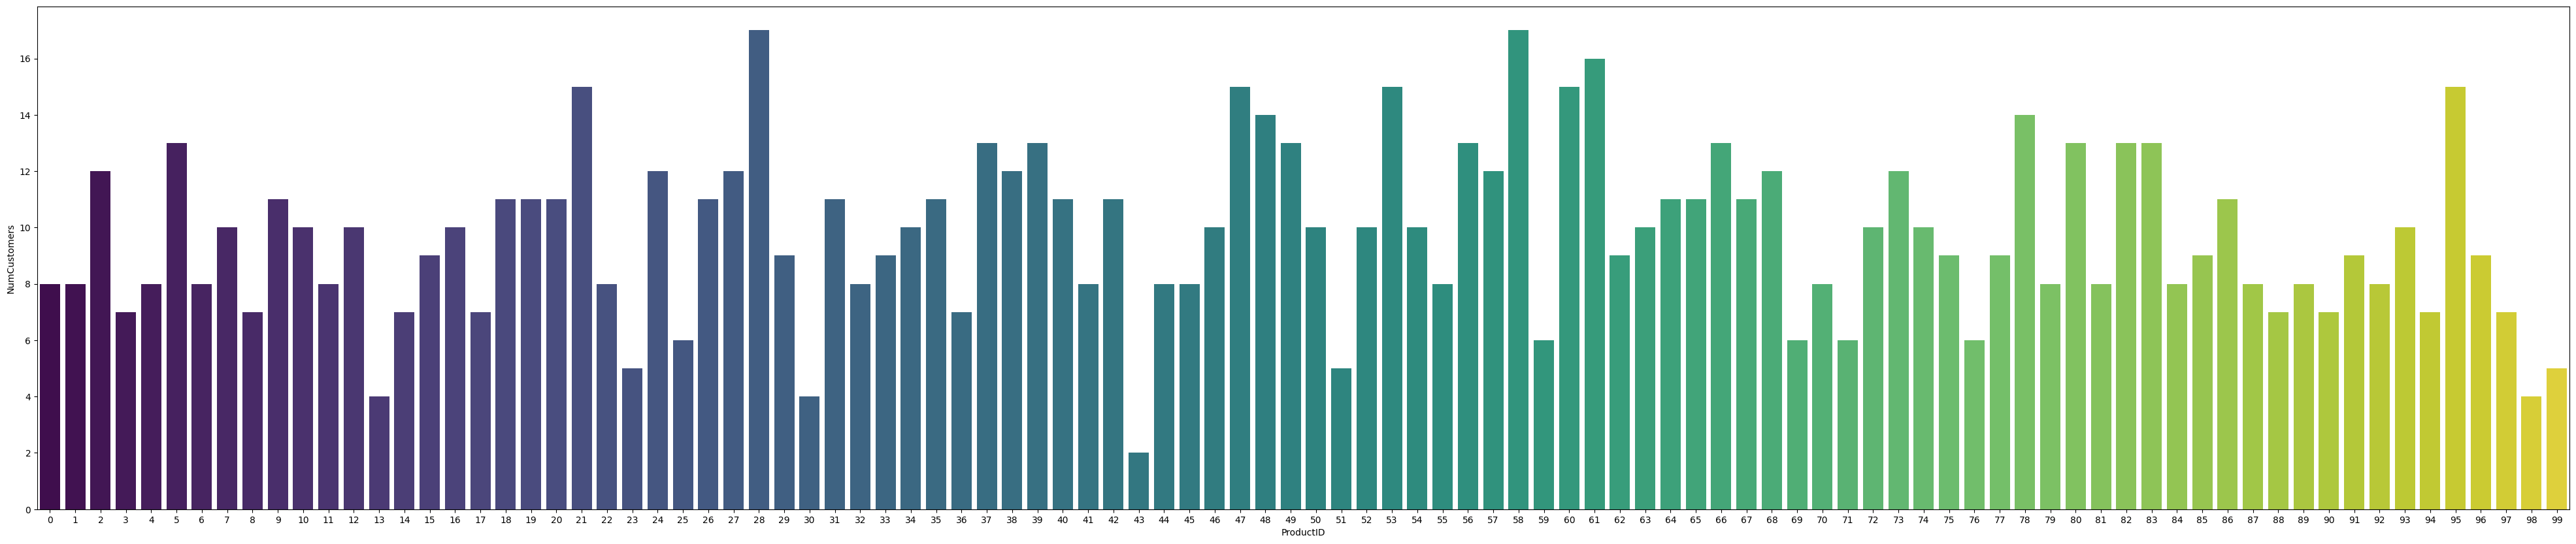

In [79]:
#anlyse that no of customers will buy same product
product_customer_count = df.groupby('ProductID')['CustomerID'].nunique().reset_index()

product_customer_count.columns = ['ProductID', 'NumCustomers']
plt.figure(figsize=(50, 10))
sns.barplot(x='ProductID', y='NumCustomers', data=product_customer_count, palette='viridis')


<ipython-input-80-5f288291629f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerID', y='NumTransactions', data=customer_transaction_count, palette='viridis')


<Axes: xlabel='CustomerID', ylabel='NumTransactions'>

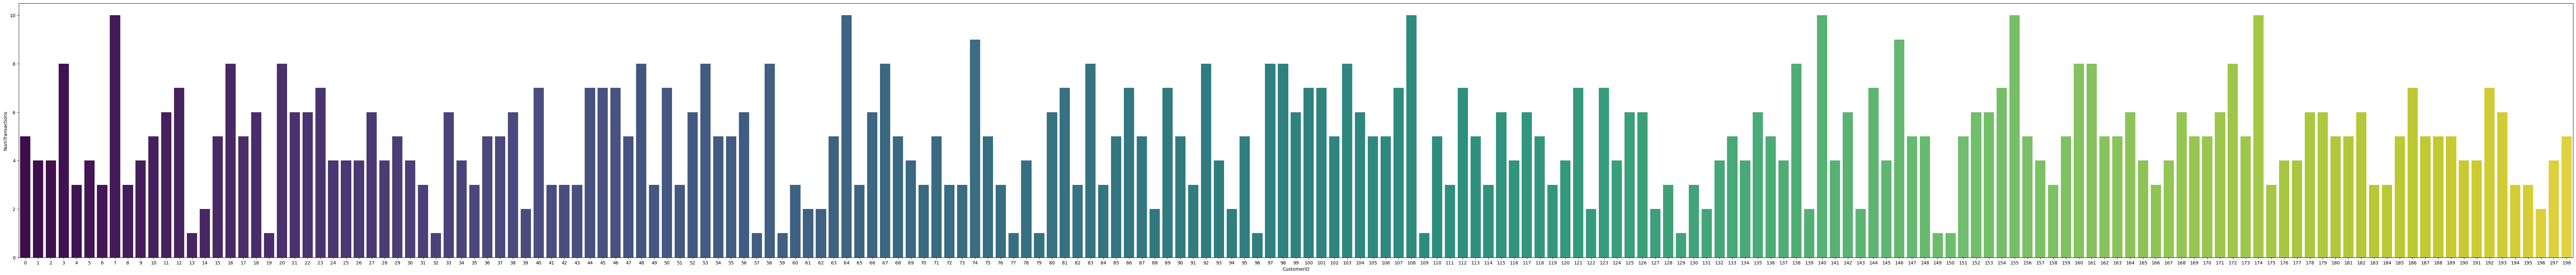

In [80]:
#most number of transactions by easch cutomers
customer_transaction_count = df.groupby('CustomerID')['TransactionID'].nunique().reset_index()

customer_transaction_count.columns = ['CustomerID', 'NumTransactions']
plt.figure(figsize=(100, 10))
sns.barplot(x='CustomerID', y='NumTransactions', data=customer_transaction_count, palette='viridis')

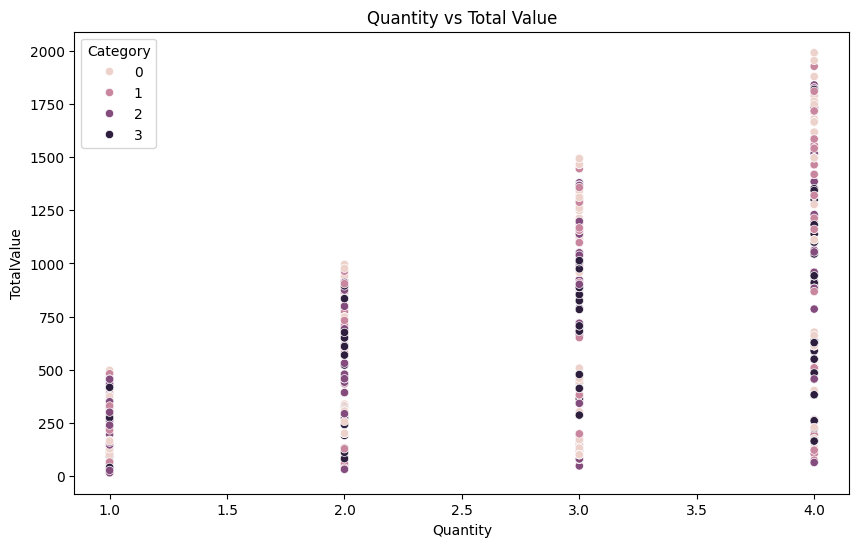

In [81]:
#higher quality value analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Quantity'], y=df['TotalValue'], hue=df['Category'])
plt.title('Quantity vs Total Value')
plt.show()

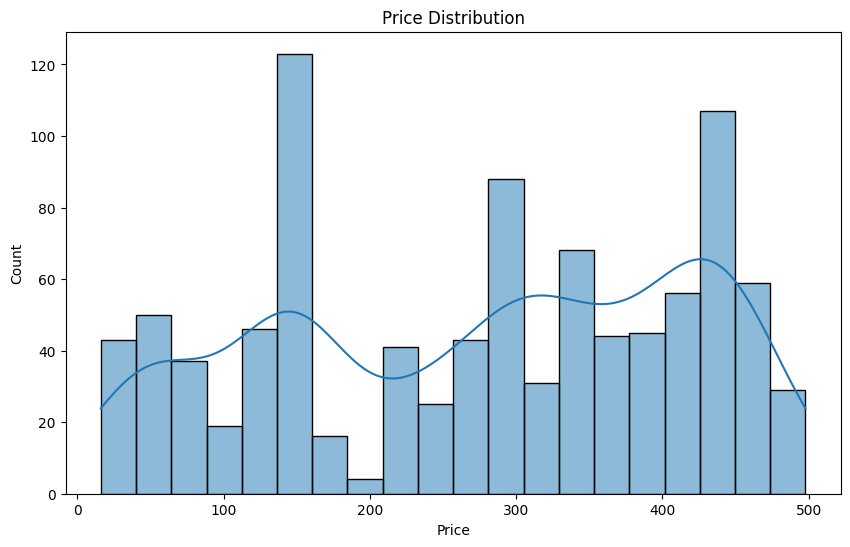

In [82]:
#price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.show()

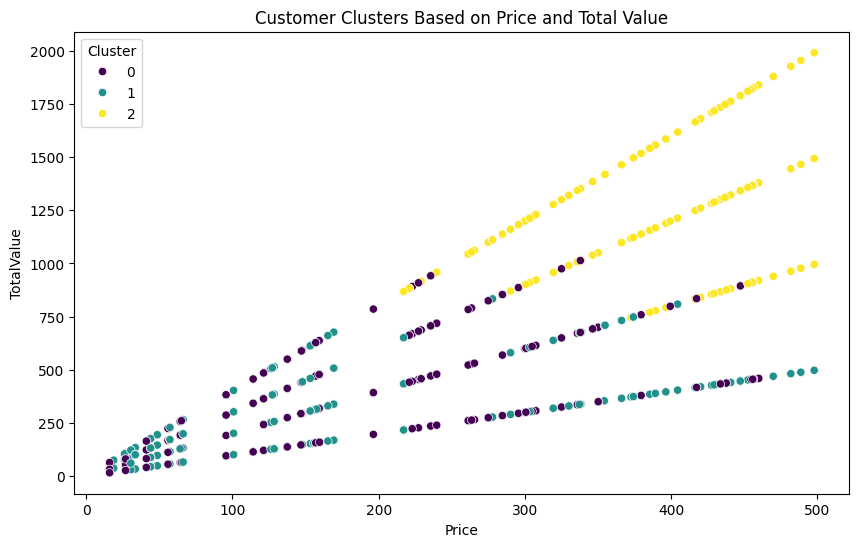

In [83]:
#Clustering suggests that customers fall into 3 primary purchasing patterns
features = ['Region', 'Category', 'Price', 'Quantity', 'TotalValue']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Price'], y=df['TotalValue'], hue=df['Cluster'], palette='viridis')
plt.title('Customer Clusters Based on Price and Total Value')
plt.show()

##Building Lookalike Model

In [94]:
features = ['Region', 'Category', 'Price', 'Quantity', 'TotalValue']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

In [95]:
nbrs = NearestNeighbors(n_neighbors=4, metric='euclidean')
nbrs.fit(scaled_data)

NearestNeighbors(metric='euclidean', n_neighbors=4)

In [96]:
lookalike_results = {}
first_20_customers = customers.iloc[:20]['CustomerID'].values

for cust_id in first_20_customers:
    customer_idx = df[df['CustomerID'] == cust_id].index[0]
    customer_vector = scaled_data[customer_idx].reshape(1, -1)
    distances, indices = nbrs.kneighbors(customer_vector)
    similar_customers = [(df.iloc[idx]['CustomerID'], round(dist, 4)) for idx, dist in zip(indices[0][1:], distances[0][1:])]
    lookalike_results[cust_id] = similar_customers

In [97]:
lookalike_df = pd.DataFrame([(key, val[0], val[1]) for key, vals in lookalike_results.items() for val in vals], columns=['CustomerID', 'SimilarCustomerID', 'SimilarityScore'])
lookalike_df.to_csv("Lookalike.csv", index=False)

##Customer Segmentation/Clustering

In [84]:
db_scores = []
silhouette_scores = []
k_values = range(2, 11)

In [85]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    db_index = davies_bouldin_score(scaled_data, cluster_labels)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

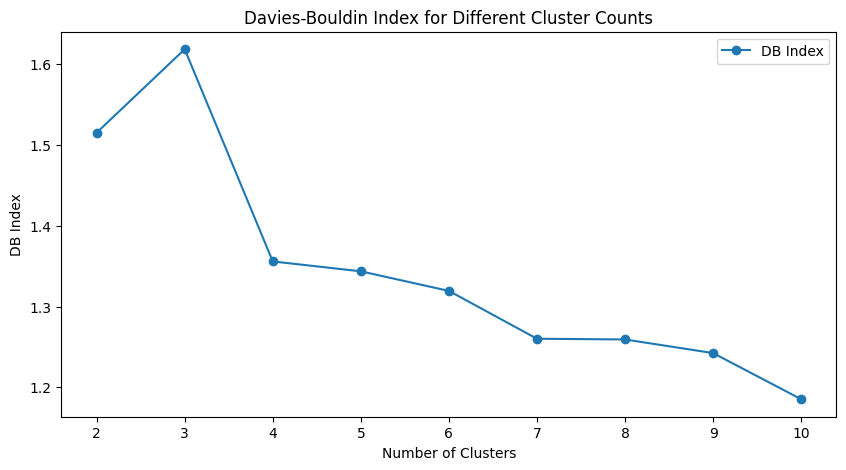

In [86]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, db_scores, marker='o', linestyle='-', label='DB Index')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.title('Davies-Bouldin Index for Different Cluster Counts')
plt.legend()
plt.show()

In [87]:
optimal_k = k_values[np.argmin(db_scores)]
print(f'Optimal Number of Clusters: {optimal_k}')

Optimal Number of Clusters: 10


In [89]:
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = final_kmeans.fit_predict(scaled_data)


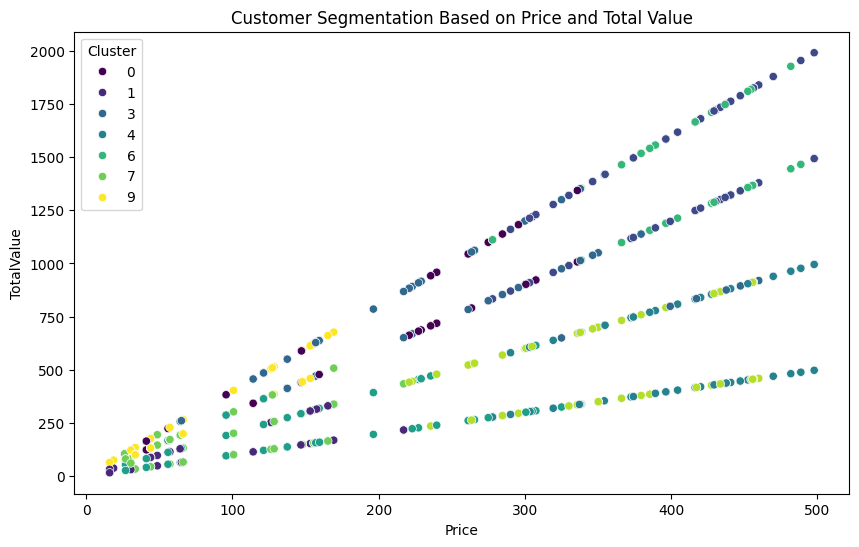

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Price'], y=df['TotalValue'], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segmentation Based on Price and Total Value')
plt.show()

In [92]:
print(f'Final Clustering Results:\nNumber of Clusters: {optimal_k}')
print(f'Davies-Bouldin Index: {min(db_scores)}')
print(f'Silhouette Score: {silhouette_scores[np.argmin(db_scores)]}')

Final Clustering Results:
Number of Clusters: 10
Davies-Bouldin Index: 1.1853299636805155
Silhouette Score: 0.2610987461809277
